<a href="https://colab.research.google.com/github/Peksyaji/Orbit-AI-Mastery/blob/main/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from yellowbrick.model_selection import FeatureImportances

In [2]:
# Import dataset
df = pd.read_csv('https://raw.githubusercontent.com/Wayan123/dataset-ml/main/car_evaluation.csv', header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [4]:
# Ringkasan dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Prepocessing

In [5]:
# Cek duplikasi
df.duplicated().sum()

0

In [6]:
print(set(df['buying']))
print(set(df['maint']))
print(set(df['doors']))
print(set(df['persons']))
print(set(df['lug_boot']))
print(set(df['safety']))
print(set(df['class']))

{'low', 'high', 'med', 'vhigh'}
{'low', 'high', 'med', 'vhigh'}
{'2', '3', '4', '5more'}
{'2', 'more', '4'}
{'med', 'small', 'big'}
{'high', 'low', 'med'}
{'acc', 'vgood', 'good', 'unacc'}


In [7]:
# Cek missing value
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# EDA dan Visualisasi

In [8]:
# Cek distribusi tiap variabel
for col in col_names:
    print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


<AxesSubplot:xlabel='buying', ylabel='count'>

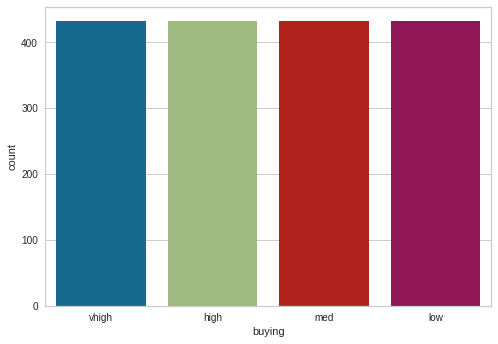

In [9]:
# Visualisasi distribusi variabel buying
sns.countplot(x = df['buying'])

<AxesSubplot:xlabel='maint', ylabel='count'>

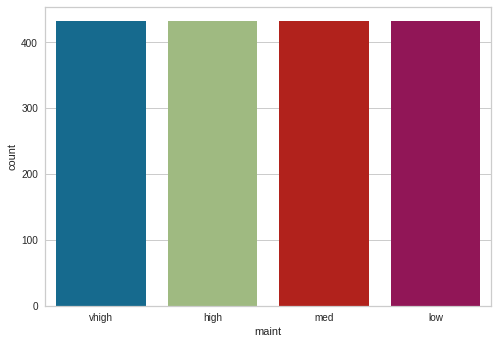

In [10]:
# Visualisasi distribusi variabel maint
sns.countplot(x = df['maint'])

<AxesSubplot:xlabel='doors', ylabel='count'>

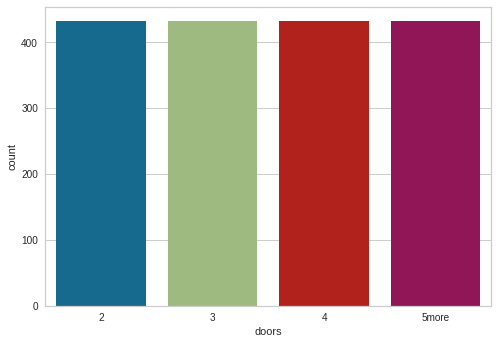

In [11]:
# Visualisasi distribusi variabel doors
sns.countplot(x = df['doors'])

<AxesSubplot:xlabel='persons', ylabel='count'>

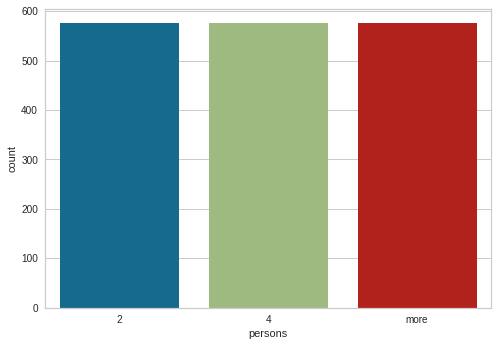

In [12]:
# Visualisasi distribusi variabel persons
sns.countplot(x = df['persons'])

<AxesSubplot:xlabel='lug_boot', ylabel='count'>

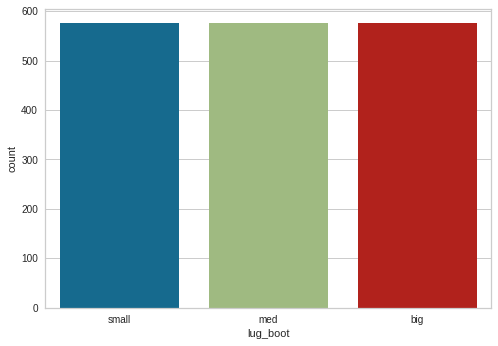

In [13]:
# Visualisasi distribusi variabel lug_boot
sns.countplot(x = df['lug_boot'])

<AxesSubplot:xlabel='safety', ylabel='count'>

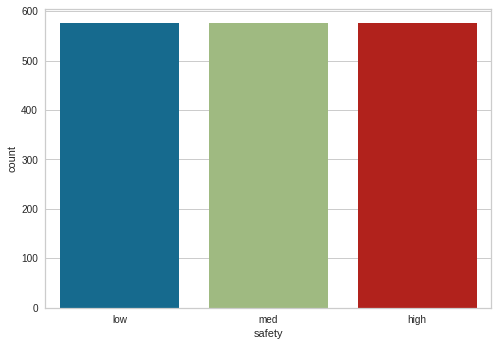

In [14]:
# Visualisasi distribusi variabel safety
sns.countplot(x = df['safety'])

<AxesSubplot:xlabel='class', ylabel='count'>

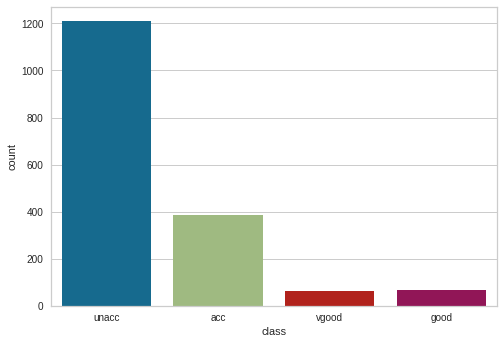

In [15]:
# Visualisasi distribusi variabel class
sns.countplot(x = df['class'])

# Decision Tree Classifier

In [16]:
# Membagi dataset menjadi variabel dependen dan independen
X = df.iloc[:,:6]
y = df.iloc[:,6]

In [17]:
# Membagi data menjadi data latih dan data uji
# Proporsi data latih dan uji adalah 1:4
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Cek ukuran X_train dan X_test
X_train.shape, X_test.shape

((1382, 6), (346, 6))

In [18]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [19]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.5 MB/s eta 0:00:00


In [20]:
# Encoding
import category_encoders as ce
encoder = ce.OrdinalEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [21]:
X_train.sample(5)

,buying,maint,doors,persons,lug_boot,safety
307,1,3,1,2,2,2
368,1,2,2,2,1,1
209,1,4,1,1,2,1
824,4,2,3,2,3,1
718,4,3,3,2,1,2


In [22]:
X_test.sample(5)

,buying,maint,doors,persons,lug_boot,safety
365,1,2,2,2,3,1
1270,2,2,1,3,2,2
173,1,4,3,2,2,1
548,4,4,4,3,1,1
1018,2,4,2,1,2,2


Documentation:

sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [23]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
y_pred_gini = clf_gini.predict(X_test)

In [44]:
# Print skor akurasi
print('Skor pada data latih: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Skor pada data uji: {:.4f}'.format(clf_gini.score(X_test, y_test)))
print('Skor akurasi: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Skor pada data latih: 0.8025
Skor pada data uji: 0.8179
Skor akurasi: 0.8179


In [26]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'acc'],
      dtype=object)

In [27]:
print(confusion_matrix(y_test, y_pred_gini))

[[ 65   0  18   0]
 [ 11   0   0   0]
 [ 17   0 218   0]
 [ 17   0   0   0]]


In [28]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.59      0.78      0.67        83
        good       0.00      0.00      0.00        11
       unacc       0.92      0.93      0.93       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.82       346
   macro avg       0.38      0.43      0.40       346
weighted avg       0.77      0.82      0.79       346



In [29]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [31]:
y_pred_en = clf_en.predict(X_test)

In [43]:
# Print skor akurasi
print('Skor pada data latih: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Skor pada data uji: {:.4f}'.format(clf_en.score(X_test, y_test)))
print('Skor akurasi: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

Skor pada data latih: 0.8025
Skor pada data uji: 0.8179
Skor akurasi: 0.8179


In [33]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'acc'],
      dtype=object)

In [34]:
print(confusion_matrix(y_test, y_pred_en))

[[ 65   0  18   0]
 [ 11   0   0   0]
 [ 17   0 218   0]
 [ 17   0   0   0]]


In [35]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.59      0.78      0.67        83
        good       0.00      0.00      0.00        11
       unacc       0.92      0.93      0.93       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.82       346
   macro avg       0.38      0.43      0.40       346
weighted avg       0.77      0.82      0.79       346



In [36]:
# Hyperparameters
model = DecisionTreeClassifier()
hyperparameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [i for i in range(1, 6)]
}
clf = GridSearchCV(
    estimator=model,
    param_grid=hyperparameters,
    cv=5,
    verbose=1,
    n_jobs=-1
)
clf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [38]:
print('Skor akurasi pada set validasi: {:.4f}'.format(clf.best_score_))
print("---------------")
print('Hyperparameter dengan performa terbaik pada set validasi: ', clf.best_params_)
print("---------------")
print(clf.best_estimator_)

Skor akurasi pada set validasi: 0.8538
---------------
Hyperparameter dengan performa terbaik pada set validasi:  {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}
---------------
DecisionTreeClassifier(max_depth=5)


In [39]:
model = clf.best_estimator_
model

DecisionTreeClassifier(max_depth=5)

In [40]:
predictions = model.predict(X_test)

In [42]:
# Print skor akurasi
print('Skor pada data latih: {:.4f}'.format(model.score(X_train, y_train)))
print('Skor pada data uji: {:.4f}'.format(model.score(X_test, y_test)))
print('Skor akurasi prediksi: {0:0.4f}'.format(accuracy_score(y_test, predictions)))

Skor pada data latih: 0.8538
Skor pada data uji: 0.8902
Skor akurasi prediksi: 0.8902


In [45]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[ 83   0   0   0]
 [ 11   0   0   0]
 [ 10   0 225   0]
 [ 17   0   0   0]]


In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         acc       0.69      1.00      0.81        83
        good       0.00      0.00      0.00        11
       unacc       1.00      0.96      0.98       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.89       346
   macro avg       0.42      0.49      0.45       346
weighted avg       0.84      0.89      0.86       346



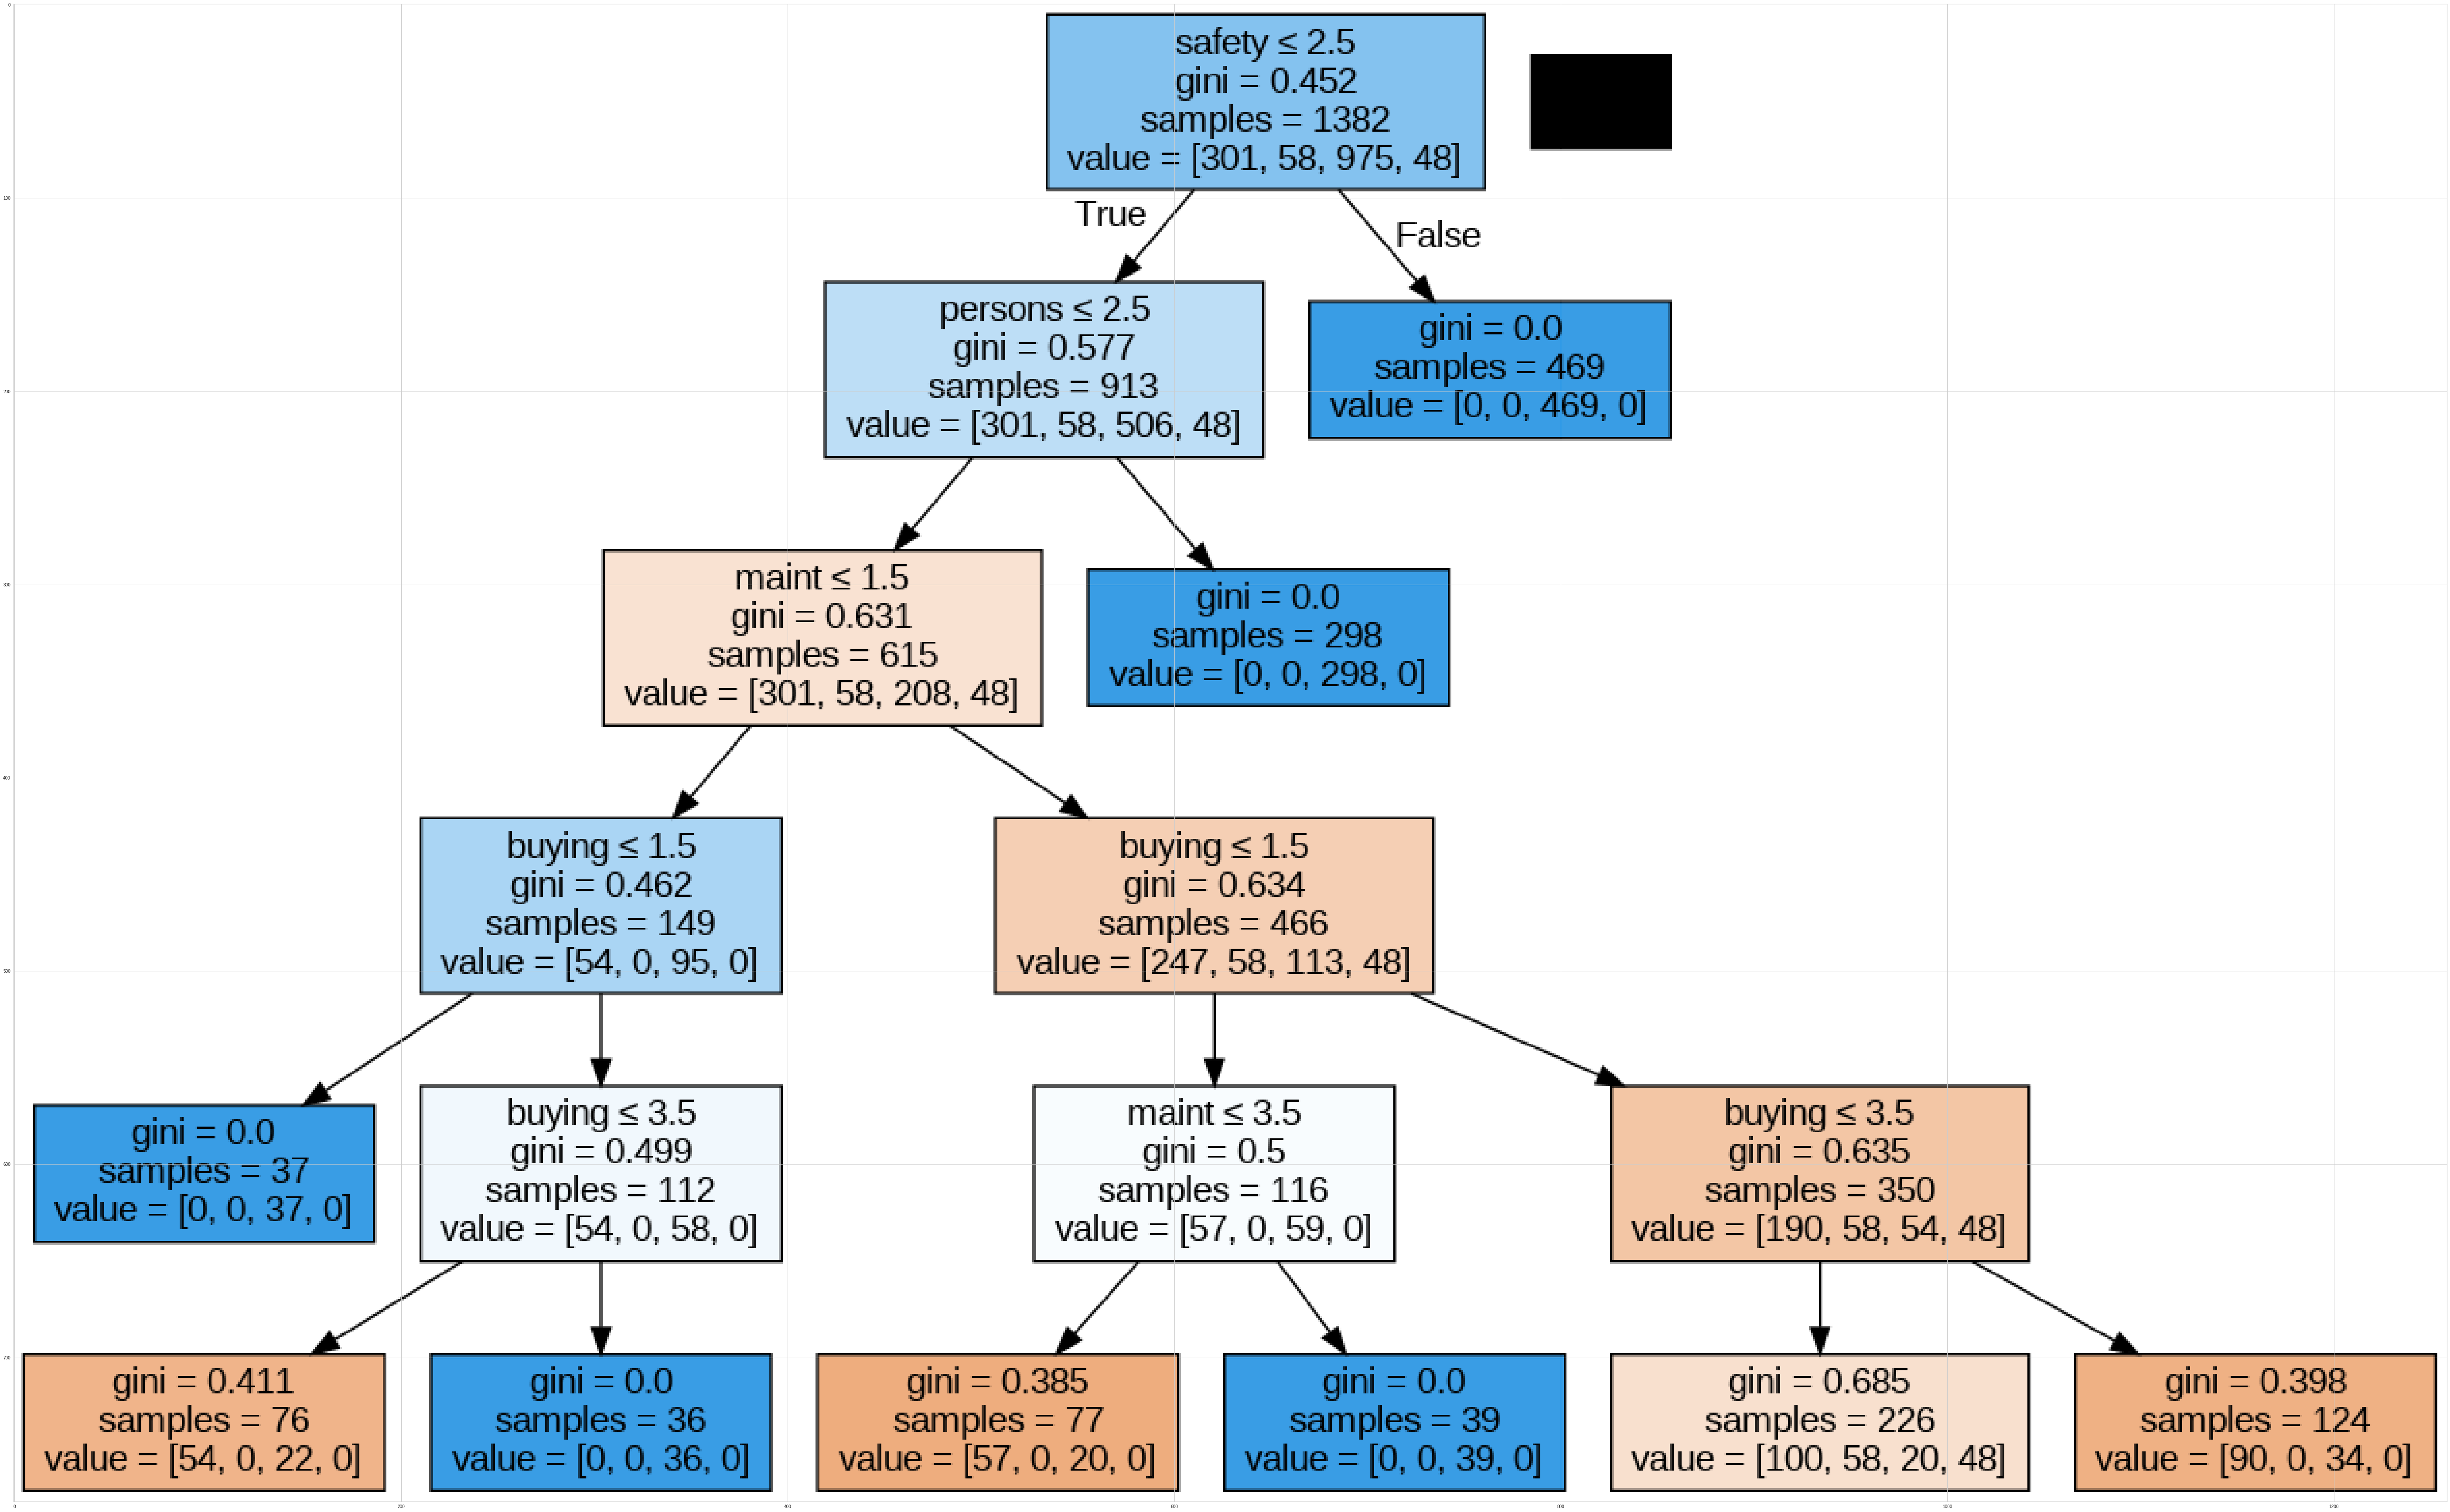

In [47]:
dot_data = StringIO()
filename = "cartree.png"
featureNames = df.columns[:6]
out = tree.export_graphviz(model, feature_names=featureNames, out_file=dot_data,
                           filled=True, special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

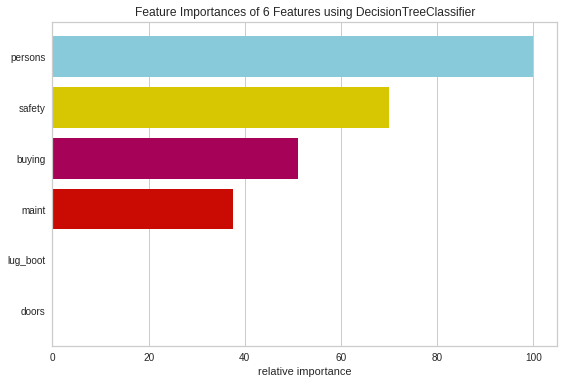

<AxesSubplot:title={'center':'Feature Importances of 6 Features using DecisionTreeClassifier'}, xlabel='relative importance'>

In [48]:
# Varibel yang berarti
viz=FeatureImportances(model)
viz.fit(X_train,y_train)
viz.show()

# Kesimpulan
1. Dalam proyek ini, data yang digunakan sudah bersih dari duplikasi, missing value, dan outlier.
2. Data dibagi menjadi variabel dependen dan independen, di mana semua variabel independen, yakni buying, maint, doors, persons, lug_boot, dan safety memiliki proporsi distribusi yang sama sedangkan untuk variabel dependen class, kategori unacc memiliki proporsi 70% dari keseluruhan data.
3. Pembagian data latih dan uji adalah 4:1.
4. Setelah melakukan hyperparameters, diperoleh bahwa skor akurasi terbaik sebesar 0.8902 dengan parameter model max_depth=5
5. Confusion matrix dan laporan klasifikasi menghasilkan kinerja model yang cukup baik.
6. Variabel 'persons' dan 'safety' sangat penting dalam model di atas, tetapi variabel 'lug_boot' dan 'doors' tidak berarti dalam klasifikasi.